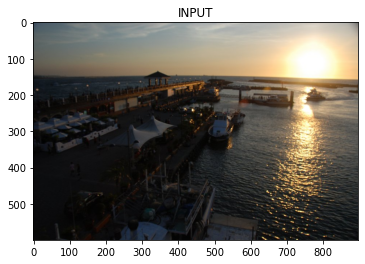

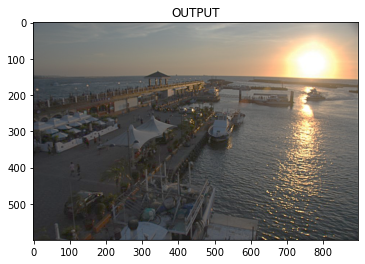

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#reading image
img=cv2.imread('1/input_3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("INPUT")
plt.show()
img=img/255

#spliting to each channel
b,g,r=cv2.split(img)

#applying dft to each channel
dft_b=np.fft.fft2(b)
dft_g=np.fft.fft2(g)
dft_r=np.fft.fft2(r)

#Gausian kernel
sigma=2
nc=np.int((img.shape[0]/2))
Nc1=np.linspace(0,nc,nc)
Nc2=np.linspace(-nc,-1,nc)
Nc=np.append(Nc1, Nc2)

nr=np.int((img.shape[1]/2))
Nr1=np.linspace(0,nr,nr)
Nr2=np.linspace(-nr,-1,nr)
Nr=np.append(Nr1, Nr2)

NC,NR=np.meshgrid(Nr,Nc)
dft_gauss_kernel=np.exp(-2*(sigma**2*np.pi**2)*((NR/(img.shape[0]))**2+(NC/(img.shape[1]))**2))

#convolution of dft of channle and dft of gausian kernel
dft_b_conv=dft_b*dft_gauss_kernel
dft_g_conv=dft_g*dft_gauss_kernel
dft_r_conv=dft_r*dft_gauss_kernel

#taking inverse fft of convloved signal
b_conv=np.real(np.fft.ifft2(dft_b_conv))
g_conv=np.real(np.fft.ifft2(dft_g_conv))
r_conv=np.real(np.fft.ifft2(dft_r_conv))

#applicaton of LCC
output = np.zeros((img.shape[0],img.shape[1],3))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):     
        output[i,j,2]=(b[i,j])**(2**(2*b_conv[i,j]-1))
        output[i,j,1]=(g[i,j])**(2**(2*g_conv[i,j]-1))
        output[i,j,0]=(r[i,j])**(2**(2*r_conv[i,j]-1))

#plotting output
plt.imshow(output)
plt.title("OUTPUT")
plt.show()
